# Exploratory Data Analysis - Sports

## Problem Statement:
### 1. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
### 2. Suggest teams or players a company should endorse for its products.

In [1]:
# import required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('ggplot')

In [2]:
# import the dataset.

df_deliveries = pd.read_csv('deliveries.csv')
df_matches = pd.read_csv('matches.csv')

In [3]:
# reading the datasets

df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Data Preprocessing 

In [5]:
# getting to know the data better

df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

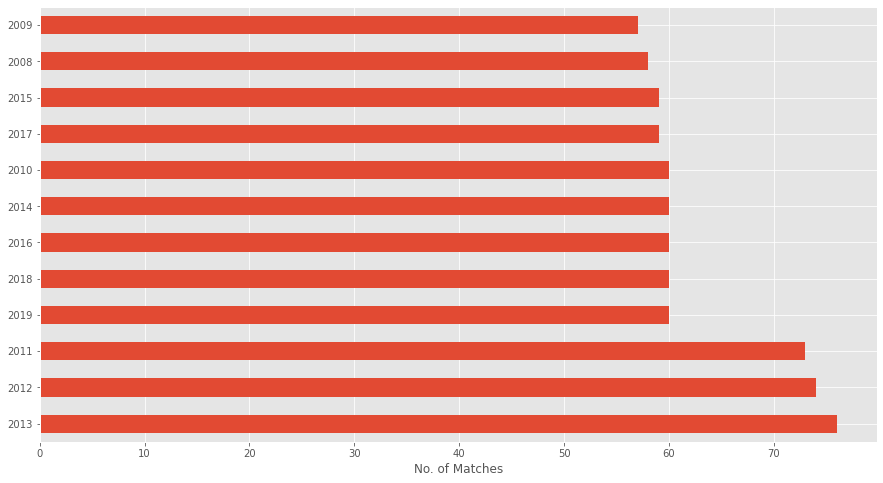

In [7]:
# number of matches per season.

df_season = df_matches.sort_values(by='season')
df_season.season.value_counts().plot(kind='barh')
plt.xlabel('No. of Matches')
plt.show()

- Most number matches played is in 2013.

In [8]:
print('The shape of the deliveries dataset :',df_deliveries.shape)
print('The shape of the macthes dataset :',df_matches.shape)

The shape of the deliveries dataset : (179078, 21)
The shape of the macthes dataset : (756, 18)


## Problem 1 :
### Which is the most successful team?

In [9]:
# getting the team with most wins.

total_match_wins = pd.DataFrame(df_matches.winner.value_counts())
total_match_wins = total_match_wins.reset_index()
total_match_wins = total_match_wins.rename(columns= {'winner':'total_match_wins', 'index':'team_name'})
total_match_wins

,team_name,total_match_wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


In [10]:
# getting the total number of match each team played as batting first.

temp_df1 = pd.DataFrame(df_matches.team1.value_counts())
temp_df1 = temp_df1.reset_index()
temp_df1 = temp_df1.rename(columns={'index':'team_name'})
temp_df1

,team_name,team1
0,Mumbai Indians,101
1,Kings XI Punjab,91
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,85
4,Kolkata Knight Riders,83
5,Delhi Daredevils,72
6,Rajasthan Royals,67
7,Sunrisers Hyderabad,63
8,Deccan Chargers,43
9,Pune Warriors,20


In [12]:
# getting the total number of match each team played as batting second.

temp_df2 = pd.DataFrame(df_matches.team2.value_counts())
temp_df2 = temp_df2.reset_index()
temp_df2 = temp_df2.rename(columns={'index':'team_name'})
temp_df2

,team_name,team2
0,Kolkata Knight Riders,95
1,Royal Challengers Bangalore,95
2,Delhi Daredevils,89
3,Mumbai Indians,86
4,Kings XI Punjab,85
5,Rajasthan Royals,80
6,Chennai Super Kings,75
7,Sunrisers Hyderabad,45
8,Deccan Chargers,32
9,Pune Warriors,26


In [13]:
# getting the total number of match each team played by combining batting 1st and batting 2nd.

total_match_per_team = pd.merge(temp_df1, temp_df2, on='team_name')
total_match_per_team

,team_name,team1,team2
0,Mumbai Indians,101,86
1,Kings XI Punjab,91,85
2,Chennai Super Kings,89,75
3,Royal Challengers Bangalore,85,95
4,Kolkata Knight Riders,83,95
5,Delhi Daredevils,72,89
6,Rajasthan Royals,67,80
7,Sunrisers Hyderabad,63,45
8,Deccan Chargers,43,32
9,Pune Warriors,20,26


In [14]:
# getting the total number of match each team played as batting first.

total_match_per_team['total_matches'] = total_match_per_team.team1 + total_match_per_team.team2
total_match_per_team

,team_name,team1,team2,total_matches
0,Mumbai Indians,101,86,187
1,Kings XI Punjab,91,85,176
2,Chennai Super Kings,89,75,164
3,Royal Challengers Bangalore,85,95,180
4,Kolkata Knight Riders,83,95,178
5,Delhi Daredevils,72,89,161
6,Rajasthan Royals,67,80,147
7,Sunrisers Hyderabad,63,45,108
8,Deccan Chargers,43,32,75
9,Pune Warriors,20,26,46


In [63]:
# to get the success rate, we are giving the condition that team should played minimum of 50 matches.
# in this way we can removw the temporary and discontinued team from the dataset.

total_match_per_team = total_match_per_team[total_match_per_team.total_matches > 50 ]

In [64]:
# combining the total matches won dataset into the total matches played dataset.

successful_team = pd.merge(total_match_per_team,total_match_wins, on='team_name')
successful_team

,team_name,team1,team2,total_matches,total_match_wins
0,Mumbai Indians,101,86,187,109
1,Kings XI Punjab,91,85,176,82
2,Chennai Super Kings,89,75,164,100
3,Royal Challengers Bangalore,85,95,180,84
4,Kolkata Knight Riders,83,95,178,92
5,Delhi Daredevils,72,89,161,67
6,Rajasthan Royals,67,80,147,75
7,Sunrisers Hyderabad,63,45,108,58
8,Deccan Chargers,43,32,75,29


In [65]:
# getting the success % by dividing the number of wins by number of matches played.

successful_team['success%'] = round(successful_team.total_match_wins / successful_team.total_matches*100,2)
successful_team = successful_team.sort_values(by='total_match_wins',ascending=False)
successful_team = successful_team.reset_index(drop=True)
successful_team

,team_name,team1,team2,total_matches,total_match_wins,success%
0,Mumbai Indians,101,86,187,109,58.29
1,Chennai Super Kings,89,75,164,100,60.98
2,Kolkata Knight Riders,83,95,178,92,51.69
3,Royal Challengers Bangalore,85,95,180,84,46.67
4,Kings XI Punjab,91,85,176,82,46.59
5,Rajasthan Royals,67,80,147,75,51.02
6,Delhi Daredevils,72,89,161,67,41.61
7,Sunrisers Hyderabad,63,45,108,58,53.70
8,Deccan Chargers,43,32,75,29,38.67


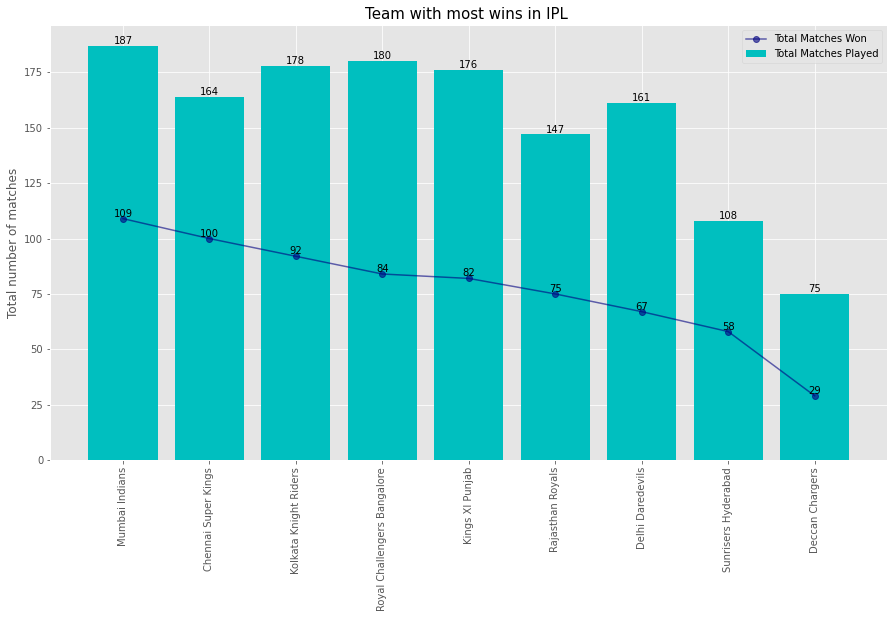

In [123]:
# plotting the graph to visualize the teams with total matches played against total matches won.

plt.bar(successful_team.team_name, successful_team.total_matches, label='Total Matches Played', color = 'c')
for i in range(len(successful_team)):
    plt.text(successful_team.team_name[i],successful_team.total_matches[i], str(successful_team.total_matches[i]),ha='center',va='bottom')

plt.plot(successful_team.team_name, successful_team.total_match_wins,'navy',alpha = 0.6,marker='o', label='Total Matches Won')
for i in range(len(successful_team)):
    plt.text(successful_team.team_name[i],successful_team.total_match_wins[i], str(successful_team.total_match_wins[i]),ha='center',va='bottom')

plt.xticks(rotation = 90)
plt.ylabel("Total number of matches",size=12)
plt.title("Team with most wins in IPL ",size=15)
plt.legend()
plt.show()

- Mumbai Indians is the team with most wins in IPL history.

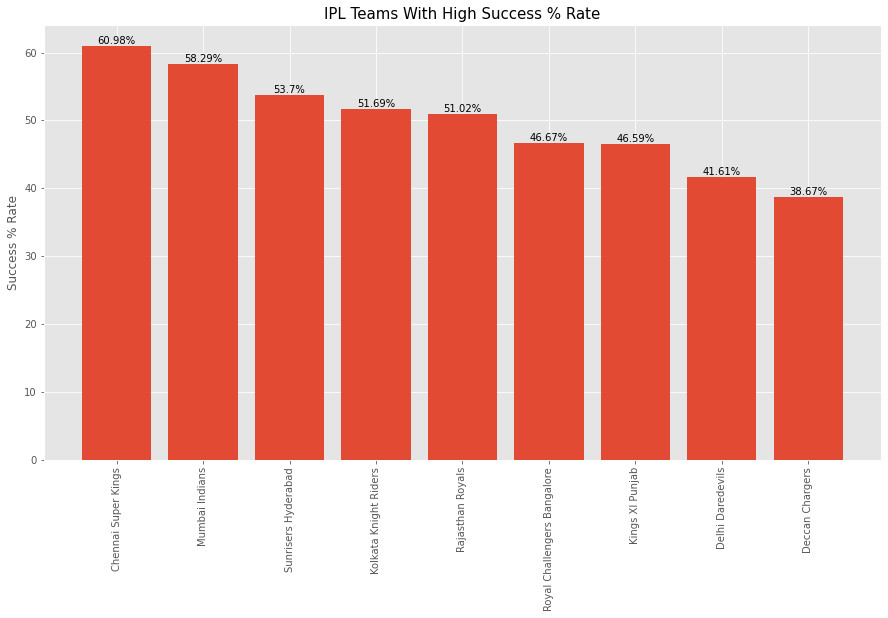

In [67]:
# plotting the success percentage of each IPL team 

successful_team_by_success = successful_team.sort_values(by='success%', ascending=False)

plt.bar(successful_team_by_success.team_name, successful_team_by_success['success%'])
for i in range(len(successful_team)):
    plt.text(successful_team_by_success.team_name[i],successful_team_by_success['success%'][i], str(successful_team['success%'][i])+'%',ha='center',va='bottom')

plt.xticks(rotation=90)
plt.ylabel('Success % Rate',size=12)
plt.title('IPL Teams With High Success % Rate',size=15)
plt.show()

- When we compare the no. of matches played and no. of matches won, we can clearly say that CSK has the highest success rate in the history of IPL.

## Problem 2 :
### A) Who is the most successful player? (Batsman/Allrounder)

In [69]:
# to get the most successful player in IPL, we need to get the player statistics from the deliveries dataset.

df_deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [80]:
# defining function to get the player statistics

def balls_per_dismissal(total_balls,dismissed):
    if dismissed > 0 :
        return total_balls/dismissed

    else:
        total_balls/1
        
def balls_per_boundaries(total_balls,total_boundaries):
    if total_boundaries > 0:
        return total_balls/total_boundaries
    
    else:
        total_balls/1
        
def PlayerStats(df):
    
    df["isDots"] = df["batsman_runs"].apply(lambda x : 1 if x == 0 else 0 )

    # column for ones, twos and threes

    df["isOnes"] = df["batsman_runs"].apply(lambda x : 1 if x == 1 else 0 )
    df["isTwos"] = df["batsman_runs"].apply(lambda x : 1 if x == 2 else 0 )
    df["isThrees"] = df["batsman_runs"].apply(lambda x : 1 if x == 3 else 0 )

    # column for boundaries 

    df["isFours"] = df["batsman_runs"].apply(lambda x : 1 if x == 4 else 0 )
    df["isSixes"] = df["batsman_runs"].apply(lambda x : 1 if x == 6 else 0 )
    
    # filtering the player level stats using groupby function
    
    runs = pd.DataFrame(df.groupby(["batsman"])["batsman_runs"].sum().reset_index().rename(columns={"batsman_runs":"runs"}))
    balls = pd.DataFrame(df.groupby(["batsman"])["match_id"].count().reset_index().rename(columns={"match_id":"balls"}))
    innings = pd.DataFrame(df.groupby(["batsman"])["match_id"].apply(lambda x : len(list(np.unique(x)))).reset_index().rename(columns={"match_id":"innings"}))
    dismissals = pd.DataFrame(df.groupby(["batsman"])["player_dismissed"].count().reset_index().rename(columns={"player_dismissed":"dismissals"}))
    dots = pd.DataFrame(df.groupby(["batsman"])["isDots"].sum().reset_index().rename(columns={"isDot":"dots"}))
    ones = pd.DataFrame(df.groupby(["batsman"])["isOnes"].sum().reset_index().rename(columns={"isOnes":"ones"}))
    twos = pd.DataFrame(df.groupby(["batsman"])["isTwos"].sum().reset_index().rename(columns={"isTwos":"twos"}))
    threes = pd.DataFrame(df.groupby(["batsman"])["isThrees"].sum().reset_index().rename(columns={"isThrees":"threes"}))
    fours = pd.DataFrame(df.groupby(["batsman"])["isFours"].sum().reset_index().rename(columns={"isFours":"fours"}))
    sixes = pd.DataFrame(df.groupby(["batsman"])["isSixes"].sum().reset_index().rename(columns={"isSixes":"sixes"}))

    # merging all the data which are filtered using groupby

    df = pd.merge(innings,runs, on="batsman").merge(balls,on="batsman").merge(dismissals,on="batsman").merge(dots,on="batsman").merge(ones,on="batsman").merge(twos,on="batsman").merge(threes,on="batsman").merge(fours,on="batsman").merge(sixes,on="batsman")

    # filtering the data further to get player stats
    # strike rate

    df['SR'] = df.apply(lambda x : round(x["runs"]/x["balls"]*100,2),axis=1)
    df['RPI'] = df.apply(lambda x : round(x["runs"]/x["innings"],2),axis=1)
    df['BPD'] = df.apply(lambda x : balls_per_dismissal(x["balls"], x["dismissals"]) if x["dismissals"] > 0 else x["balls"]/1 , axis = 1)
    df['BPD'] = round(df['BPD'],2)
    df['BPB'] = df.apply(lambda x : balls_per_boundaries(x["balls"], (x["fours"]+x["sixes"])) if  x["fours"]+x["sixes"] > 0 else x["balls"]/1,axis=1)
    df['BPB'] = round(df['BPB'],2)
    
    return df

In [82]:
# applying the deliveries data into the Playerstats function to get individual player performance.

player_bat_stats = PlayerStats(df_deliveries)

In [88]:
# filtering the batsman based on minimum number of innings played.

player_bat_stats = player_bat_stats[player_bat_stats.innings > 50]

In [89]:
player_bat_stats = player_bat_stats.reset_index(drop=True)

In [93]:
player_bat_stats.head()

,batsman,innings,runs,balls,dismissals,isDots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Mishra,54,368,410,30,179,174,22,0,30,5,89.76,6.81,13.67,11.71
1,AB de Villiers,142,4428,2977,104,940,1231,220,15,357,214,148.74,31.18,28.62,5.21
2,AC Gilchrist,80,2069,1555,76,737,417,66,4,239,92,133.05,25.86,20.46,4.70
3,AD Russell,52,1445,803,41,284,270,31,0,98,119,179.95,27.79,19.59,3.70
4,AJ Finch,73,1744,1372,66,580,463,83,3,176,67,127.11,23.89,20.79,5.65


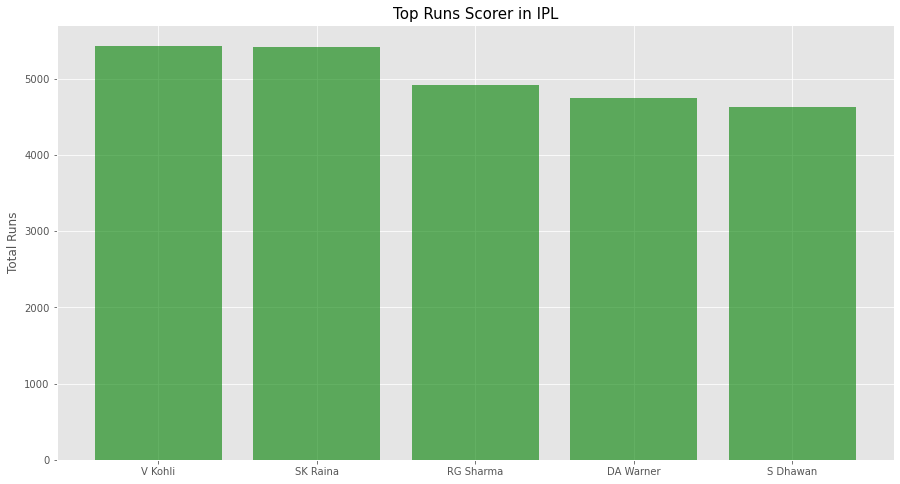

In [105]:
# plotting the top runs scorer in IPL history

top_scorer = player_bat_stats.sort_values(by='runs',ascending=False).head()

plt.bar(top_scorer.batsman, top_scorer.runs, color='green', alpha =0.6)
plt.ylabel('Total Runs',size=12)
plt.title('Top Runs Scorer in IPL',size=15)
plt.show()

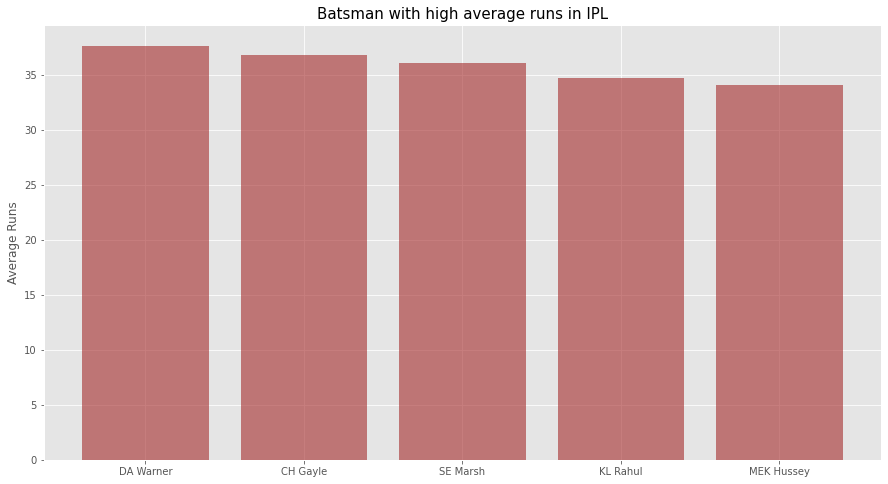

In [185]:
# plotting the players with high average runs in IPL history

top_scorer = player_bat_stats.sort_values(by='RPI',ascending=False).head()

plt.bar(top_scorer.batsman, top_scorer.RPI, color='brown', alpha =0.6)
plt.ylabel('Average Runs',size=12)
plt.title('Batsman with high average runs in IPL',size=15)
plt.show()

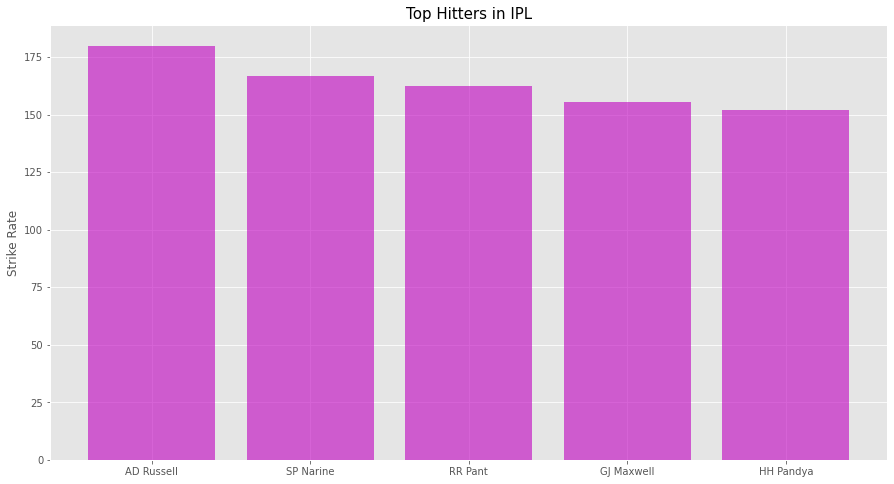

In [124]:
# plotting the players with high SR in IPL history

top_scorer = player_bat_stats.sort_values(by='SR',ascending=False).head()

plt.bar(top_scorer.batsman, top_scorer.SR, color='m', alpha =0.6)
plt.ylabel('Strike Rate',size=12)
plt.title('Top Hitters in IPL',size=15)
plt.show()

### Calculation - Normalizing all values to same dimensions

In [109]:
# initialize a variable and assign the player_bat_stat into it for calculating score based on their performance.

df = player_bat_stats.copy()

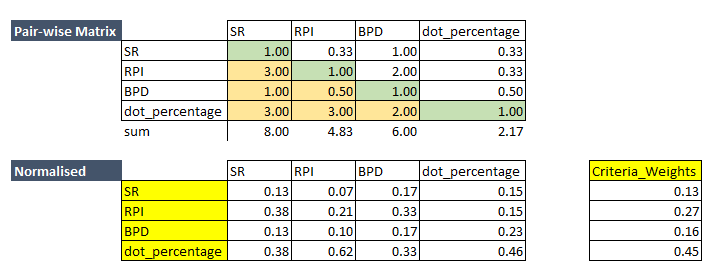

- From the above pair-wise matrix we get the important tables to consider to calculate the performance of the player and the average values for each feature.

In [151]:
wt_sr, wt_rpi, wt_bpd, wt_dot = 0.13, 0.27, 0.16, 0.45

In [111]:
# normalising the values, comparing best and worst values and transforming the values into scores.

df['calc_SR'] = df['SR'].apply(lambda x: x*x) 
df['calc_RPI'] = df['RPI'].apply(lambda x: x*x) 
df['calc_BPD'] = df['BPD'].apply(lambda x: x*x) 

sq_sr, sq_rpi, sq_bpd= np.sqrt(df[['calc_SR','calc_RPI', 'calc_BPD']].sum(axis = 0))

df['calc_SR'] = df['calc_SR'].apply(lambda x: x/sq_sr) 
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/sq_rpi) 
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/sq_bpd) 

df['calc_SR'] = df['calc_SR'].apply(lambda x: x*wt_sr) 
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x*wt_rpi) 
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x*wt_bpd) 

best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])

### Calculation - Comparision against the best & worst values

df['dev_best_SR'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr)) 
df['dev_best_RPI'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi)) 
df['dev_best_BPD'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd)) 

df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'], axis = 1) 

df['dev_worst_SR'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr)) 
df['dev_worst_RPI'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi)) 
df['dev_worst_BPD'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd)) 

df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'], axis = 1) 

### Final Step - Overall score for each player ( values from 0 - 1)

df['score'] = df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [119]:
df = df.sort_values(by='score',ascending=False)

In [181]:
# top 10 batsmans/allrounder in IPL 

successful_player = df.sort_values(by='score',ascending=False).reset_index(drop=True).head(10)
successful_player

,batsman,innings,runs,balls,dismissals,isDots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,calc_SR,calc_RPI,calc_BPD,dev_best_SR,dev_best_RPI,dev_best_BPD,dev_best_sqrt,dev_worst_SR,dev_worst_RPI,dev_worst_BPD,dev_worst_sqrt,score
0,AD Russell,52,1445,803,41,284,270,31,0,98,119,179.95,27.79,19.59,3.70,3.984396,1.042923,0.328005,0.000000,0.755721,0.458260,1.213981,8.958359,0.989931,0.062935,10.011225,0.891852
1,RR Pant,54,1792,1104,49,328,452,72,2,154,94,162.32,33.19,22.53,4.45,3.241924,1.487612,0.433844,0.551264,0.180313,0.326166,1.057744,5.065110,2.072568,0.127240,7.264919,0.872908
2,CH Gayle,124,4560,3131,110,1423,919,83,3,376,327,145.64,36.77,28.46,4.45,2.609878,1.825838,0.692279,1.889301,0.007466,0.097766,1.994533,2.619650,3.160816,0.378400,6.158866,0.755374
3,AB de Villiers,142,4428,2977,104,940,1231,220,15,357,214,148.74,31.18,28.62,5.21,2.722164,1.312887,0.700084,1.593229,0.359230,0.092945,2.045404,2.995738,1.600015,0.388064,4.983818,0.709014
4,DA Warner,126,4741,3398,114,1254,1213,271,18,459,181,139.52,37.63,29.81,5.31,2.395145,1.912245,0.759513,2.525720,0.000000,0.060241,2.585961,1.970655,3.475521,0.465638,5.911814,0.695690
5,KL Rahul,58,2013,1465,49,503,594,106,3,178,81,137.41,34.71,29.90,5.66,2.323247,1.626988,0.764106,2.759414,0.081372,0.058008,2.898794,1.773966,2.493297,0.471927,4.739191,0.620477
6,SP Narine,54,803,481,40,207,116,15,4,94,44,166.94,14.87,12.02,3.49,3.429096,0.298605,0.123487,0.308358,2.603833,0.776984,3.689176,5.942633,0.062818,0.002148,6.007599,0.619546
7,V Sehwag,104,2728,1833,98,737,558,96,2,334,106,148.83,26.23,18.70,4.17,2.725460,0.929120,0.298878,1.584921,0.966535,0.498543,3.049998,3.007156,0.776425,0.049170,3.832751,0.556863
8,GJ Maxwell,67,1403,902,62,351,284,65,1,110,91,155.54,20.94,14.55,4.49,2.976754,0.592145,0.180941,1.015342,1.742662,0.678997,3.437001,3.941853,0.296127,0.010775,4.248756,0.552809
9,SE Marsh,69,2489,1913,65,736,724,99,6,269,78,130.11,36.07,29.43,5.51,2.082956,1.756982,0.740272,3.615473,0.024107,0.070056,3.709636,1.191617,2.920723,0.439750,4.552089,0.550985


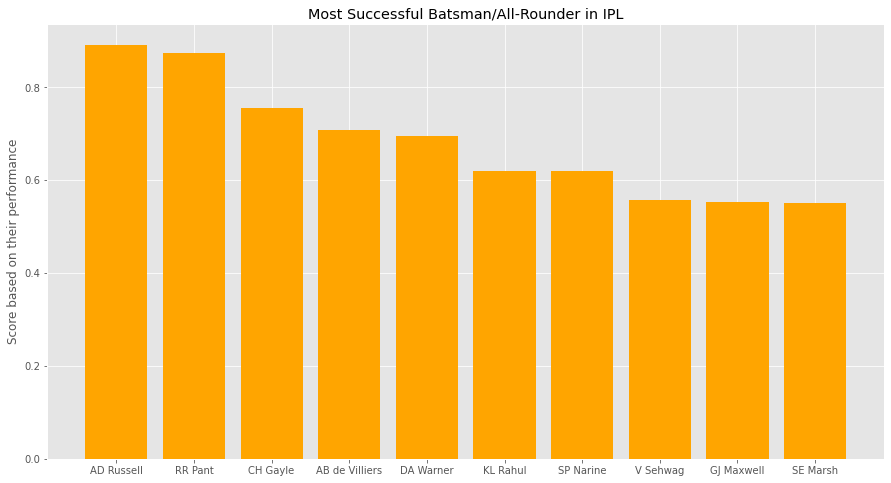

In [122]:
# plotting the top 10 batsman/allrounder.

plt.bar(successful_player.batsman, successful_player.score, color = 'orange')
plt.title('Most Successful Batsman/All-Rounder in IPL')
plt.ylabel('Score based on their performance')
plt.show()

## Problem 2 :
### B) Who is the most successful player? (Bowler)

In [125]:
# taking a copy of the deliveries to work on bowler stats.

df_bowl = df_deliveries.copy()

In [126]:
# defining a function to get the bowler wicket.

def is_bowlers_wicket(player_dismissed, dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

In [127]:
# adding a new column for bowler wicket.

df_bowl['isBowlerWk'] = df_bowl.apply(lambda x: is_bowlers_wicket(x['player_dismissed'], x['dismissal_kind']), axis = 1)

In [129]:
df_bowl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isDots,isOnes,isTwos,isThrees,isFours,isSixes,isBowlerWk
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0,0,0,1,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,0,0,0,0,0,0


In [138]:
# defining a function to get bowler stats.

def bowlerStats(df):

    df['isDot'] = df['total_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['total_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['total_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['total_runs'].apply(lambda x: 1 if x == 3 else 0)

    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['bowler'])['total_runs'].sum()).reset_index().rename(columns = {'total_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['bowler'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['bowler'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['bowler'])['isBowlerWk'].sum()).reset_index().rename(columns = {'isBowlerWk':'dismissals'})

    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, balls, on = 'bowler').merge(runs, on = 'bowler').merge(dismissals, on = 'bowler').merge(dots, on = 'bowler')
    
    df['dot%'] = df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
    df['dot%'] = round(df['dot%'],2)
    df['avg'] = df.apply(lambda x: x['runs']/x['dismissals'] if x['dismissals']>0 else x['runs']/1, axis=1)
    df['avg'] = round(df['avg'],2)
    df['SR'] = df.apply(lambda x: x['balls']/x['dismissals'] if x['dismissals']>0 else x['balls']/1, axis=1)
    df['SR'] = round(df['SR'],2)
    
    return df

In [155]:
# getting the bowler stats.

player_bowl_stats = bowlerStats(df_bowl)

In [156]:
# filtering the bowler by minimum innings played.

player_bowl_stats = player_bowl_stats[player_bowl_stats.innings > 50].reset_index(drop=True)

In [157]:
# displaying the bowlers along with their stats.

player_bowl_stats.head()

,bowler,innings,balls,runs,dismissals,dots,dot%,avg,SR
0,A Mishra,147,3172,3850,156,1108,34.93,24.68,20.33
1,A Nehra,88,1974,2537,106,798,40.43,23.93,18.62
2,AB Dinda,75,1589,2103,69,627,39.46,30.48,23.03
3,AD Russell,61,1072,1584,55,362,33.77,28.80,19.49
4,AR Patel,81,1745,2183,71,560,32.09,30.75,24.58


In [158]:
# to calculate the average of each bowlers, we need total overs bowled.

player_bowl_stats['total_overs'] = round(player_bowl_stats.balls/6,2)

In [159]:
# calculating average of each bowler.

player_bowl_stats['eco'] = round(player_bowl_stats.runs/player_bowl_stats.total_overs,2)
player_bowl_stats.head()

,bowler,innings,balls,runs,dismissals,dots,dot%,avg,SR,total_overs,eco
0,A Mishra,147,3172,3850,156,1108,34.93,24.68,20.33,528.67,7.28
1,A Nehra,88,1974,2537,106,798,40.43,23.93,18.62,329.00,7.71
2,AB Dinda,75,1589,2103,69,627,39.46,30.48,23.03,264.83,7.94
3,AD Russell,61,1072,1584,55,362,33.77,28.80,19.49,178.67,8.87
4,AR Patel,81,1745,2183,71,560,32.09,30.75,24.58,290.83,7.51


In [198]:
# ranking the bowlers based on their performance (average, economy and strike rate)

top_bowlers = player_bowl_stats.sort_values(by=['avg','eco','SR'],ascending=True).reset_index(drop=True).head(10)
top_bowlers

,bowler,innings,balls,runs,dismissals,dots,dot%,avg,SR,total_overs,eco
0,SL Malinga,122,2974,3511,170,1144,38.47,20.65,17.49,495.67,7.08
1,Imran Tahir,55,1249,1656,79,406,32.51,20.96,15.81,208.17,7.96
2,MM Patel,63,1382,1733,74,590,42.69,23.42,18.68,230.33,7.52
3,Sandeep Sharma,68,1546,1967,83,649,41.98,23.70,18.63,257.67,7.63
4,A Nehra,88,1974,2537,106,798,40.43,23.93,18.62,329.00,7.71
5,SP Narine,109,2600,2939,122,1038,39.92,24.09,21.31,433.33,6.78
6,YS Chahal,83,1841,2416,100,639,34.71,24.16,18.41,306.83,7.87
7,B Kumar,117,2707,3264,133,1116,41.23,24.54,20.35,451.17,7.23
8,A Mishra,147,3172,3850,156,1108,34.93,24.68,20.33,528.67,7.28
9,DJ Bravo,131,2711,3733,147,825,30.43,25.39,18.44,451.83,8.26


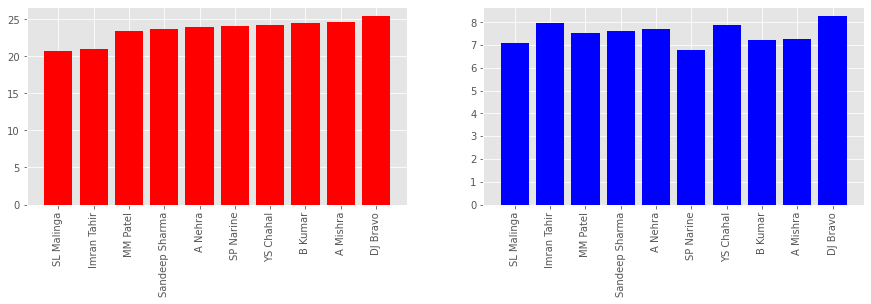

In [205]:
# top 10 bowlers in IPL history


plt.subplot(2,2,1)
plt.bar(top_bowlers.bowler, top_bowlers.avg, color='red')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(top_bowlers.bowler, top_bowlers.eco, color='blue')
plt.xticks(rotation=90)

plt.show()

In [180]:
# leading wicket taker

top_wicketaker = player_bowl_stats.sort_values(by='dismissals', ascending=False).reset_index(drop=True).head(10)
top_wicketaker

,bowler,innings,balls,runs,dismissals,dots,dot%,avg,SR,total_overs,eco
0,SL Malinga,122,2974,3511,170,1144,38.47,20.65,17.49,495.67,7.08
1,A Mishra,147,3172,3850,156,1108,34.93,24.68,20.33,528.67,7.28
2,Harbhajan Singh,157,3451,4050,150,1244,36.05,27.00,23.01,575.17,7.04
3,PP Chawla,156,3157,4153,149,1100,34.84,27.87,21.19,526.17,7.89
4,DJ Bravo,131,2711,3733,147,825,30.43,25.39,18.44,451.83,8.26
5,B Kumar,117,2707,3264,133,1116,41.23,24.54,20.35,451.17,7.23
6,R Ashwin,136,3016,3391,125,1067,35.38,27.13,24.13,502.67,6.75
7,SP Narine,109,2600,2939,122,1038,39.92,24.09,21.31,433.33,6.78
8,UT Yadav,118,2605,3640,119,942,36.16,30.59,21.89,434.17,8.38
9,RA Jadeja,142,2541,3221,108,814,32.03,29.82,23.53,423.50,7.61


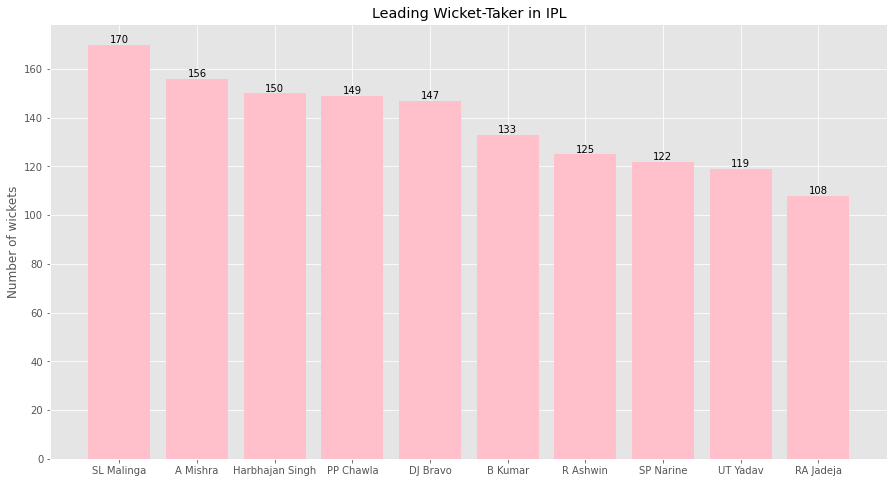

In [212]:
# plotting the leading wicket-taker.

plt.bar(top_wicketaker.bowler, top_wicketaker.dismissals, color='pink')

for i in range(len(top_wicketaker)):
    plt.text(top_wicketaker.bowler[i], top_wicketaker.dismissals[i], str(top_wicketaker.dismissals[i]), ha='center', va='bottom')
plt.ylabel('Number of wickets')
plt.title('Leading Wicket-Taker in IPL')
plt.show()

## Problem 3:
### Factors contributing win or loss of the match.

In [215]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [227]:
toss_winner_match_winner = df_matches[df_matches.toss_winner == df_matches.winner]

In [239]:
toss_winner_match_loser = df_matches[df_matches.toss_winner != df_matches.winner]

Mumbai Indians                 53
Kings XI Punjab                47
Chennai Super Kings            43
Royal Challengers Bangalore    43
Kolkata Knight Riders          39
Sunrisers Hyderabad            35
Rajasthan Royals               33
Delhi Daredevils               32
Deccan Chargers                10
Pune Warriors                   9
Rising Pune Supergiant          5
Gujarat Lions                   3
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Name: winner, dtype: int64

In [240]:
tw_ml = pd.DataFrame(toss_winner_match_loser.winner.value_counts())
tw_ml = tw_ml.reset_index()
tw_ml = tw_ml.rename(columns={'index':'team_name', 'winner':'toss_win_match_loss'})
tw_ml

,team_name,toss_win_match_loss
0,Mumbai Indians,53
1,Kings XI Punjab,47
2,Chennai Super Kings,43
3,Royal Challengers Bangalore,43
4,Kolkata Knight Riders,39
5,Sunrisers Hyderabad,35
6,Rajasthan Royals,33
7,Delhi Daredevils,32
8,Deccan Chargers,10
9,Pune Warriors,9


In [241]:
tw_mw = pd.DataFrame(toss_winner_match_winner.winner.value_counts())
tw_mw = tw_mw.reset_index()
tw_mw = tw_mw.rename(columns={'index':'team_name', 'winner':'toss_win_match_win'})
tw_mw

,team_name,toss_win_match_win
0,Chennai Super Kings,57
1,Mumbai Indians,56
2,Kolkata Knight Riders,53
3,Rajasthan Royals,42
4,Royal Challengers Bangalore,41
5,Kings XI Punjab,35
6,Delhi Daredevils,35
7,Sunrisers Hyderabad,23
8,Deccan Chargers,19
9,Gujarat Lions,10


In [245]:
toss_df = pd.merge(successful_team,tw_mw,on='team_name')
toss_df = pd.merge(toss_df,tw_ml,on='team_name')
toss_df

,team_name,team1,team2,total_matches,total_match_wins,success%,toss_win_match_win,toss_win_match_loss
0,Mumbai Indians,101,86,187,109,58.29,56,53
1,Chennai Super Kings,89,75,164,100,60.98,57,43
2,Kolkata Knight Riders,83,95,178,92,51.69,53,39
3,Royal Challengers Bangalore,85,95,180,84,46.67,41,43
4,Kings XI Punjab,91,85,176,82,46.59,35,47
5,Rajasthan Royals,67,80,147,75,51.02,42,33
6,Delhi Daredevils,72,89,161,67,41.61,35,32
7,Sunrisers Hyderabad,63,45,108,58,53.70,23,35
8,Deccan Chargers,43,32,75,29,38.67,19,10


In [250]:
toss_df['toss_win_match_win%'] = round(toss_df.toss_win_match_win / toss_df.total_match_wins*100,2)
toss_df['toss_win_match_loss%'] = round(toss_df.toss_win_match_loss / toss_df.total_match_wins*100,2)
toss_df

,team_name,team1,team2,total_matches,total_match_wins,success%,toss_win_match_win,toss_win_match_loss,toss_win_match_win%,toss_win_match_loss%
0,Mumbai Indians,101,86,187,109,58.29,56,53,51.38,48.62
1,Chennai Super Kings,89,75,164,100,60.98,57,43,57.00,43.00
2,Kolkata Knight Riders,83,95,178,92,51.69,53,39,57.61,42.39
3,Royal Challengers Bangalore,85,95,180,84,46.67,41,43,48.81,51.19
4,Kings XI Punjab,91,85,176,82,46.59,35,47,42.68,57.32
5,Rajasthan Royals,67,80,147,75,51.02,42,33,56.00,44.00
6,Delhi Daredevils,72,89,161,67,41.61,35,32,52.24,47.76
7,Sunrisers Hyderabad,63,45,108,58,53.70,23,35,39.66,60.34
8,Deccan Chargers,43,32,75,29,38.67,19,10,65.52,34.48


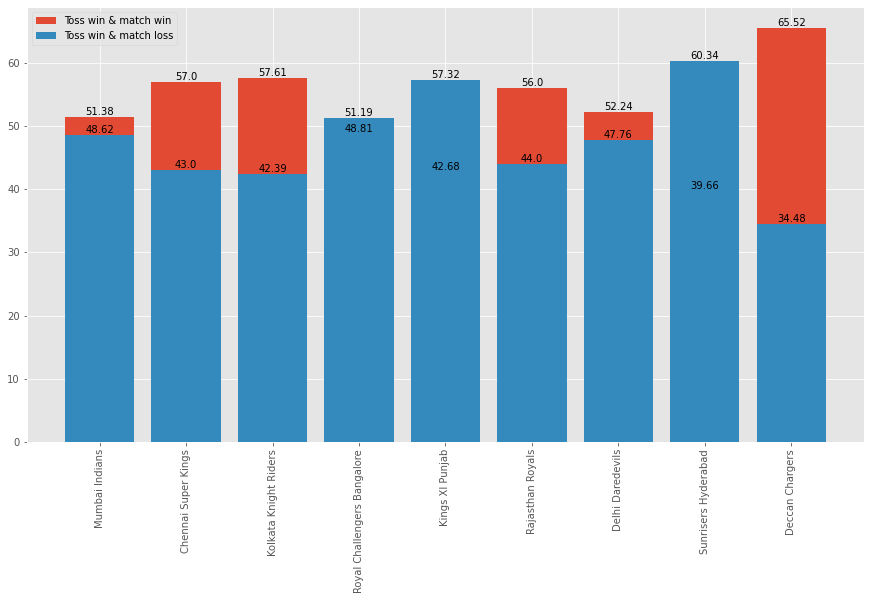

In [260]:
# plotting the toss win and match win/loss percetntage

#plt.subplot(2,2,1)
plt.bar(toss_df.team_name, toss_df['toss_win_match_win%'], label='Toss win & match win')
for i in range(len(toss_df)):
    plt.text(toss_df.team_name[i], toss_df['toss_win_match_win%'][i], str(toss_df['toss_win_match_win%'][i]), ha='center',va='bottom')
plt.xticks(rotation=90)

plt.bar(toss_df.team_name, toss_df['toss_win_match_loss%'],label='Toss win & match loss')
for i in range(len(toss_df)):
    plt.text(toss_df.team_name[i], toss_df['toss_win_match_loss%'][i], str(toss_df['toss_win_match_loss%'][i]), ha='center',va='bottom')
plt.xticks(rotation=90)
plt.legend()
plt.show()

- From the above graph we can say that either winning or losing of toss does not have much contribution to the winning of match.